# Transformaciones 2D con Matrices
Este notebook demuestra transformaciones geométricas 2D (traslación, rotación, escala) usando matrices de transformación, y genera animaciones exportadas como GIF.

## 1. Importar Bibliotecas

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
from IPython.display import Image, HTML, display
import os

# Configuración para mejor visualización
plt.rcParams['figure.figsize'] = (8, 8)
plt.rcParams['figure.dpi'] = 100

# Función helper para mostrar GIFs animados en VS Code/Jupyter
def show_gif(filepath):
    """Muestra un GIF animado usando HTML (más compatible con VS Code)"""
    # Convertir a ruta absoluta
    abs_path = os.path.abspath(filepath)
    # Usar HTML img tag que mantiene la animación
    return HTML(f'<img src="{abs_path}" style="max-width:800px;">')

## 2. Definir Funciones de Transformación

Usaremos coordenadas homogéneas (x, y, 1) para poder aplicar todas las transformaciones (incluida traslación) como multiplicaciones de matrices.

In [28]:
def translation_matrix(tx, ty):
    """Matriz de traslación 2D en coordenadas homogéneas"""
    return np.array([
        [1, 0, tx],
        [0, 1, ty],
        [0, 0, 1]
    ])

def rotation_matrix(angle):
    """Matriz de rotación 2D (ángulo en radianes)"""
    cos_a, sin_a = np.cos(angle), np.sin(angle)
    return np.array([
        [cos_a, -sin_a, 0],
        [sin_a, cos_a, 0],
        [0, 0, 1]
    ])

def scale_matrix(sx, sy):
    """Matriz de escala 2D"""
    return np.array([
        [sx, 0, 0],
        [0, sy, 0],
        [0, 0, 1]
    ])

def apply_transformation(points, matrix):
    """
    Aplica una matriz de transformación a un conjunto de puntos.
    points: array de forma (2, n) o (3, n) con coordenadas homogéneas
    matrix: matriz de transformación 3x3
    """
    # Si los puntos son 2D, convertir a homogéneas
    if points.shape[0] == 2:
        ones = np.ones((1, points.shape[1]))
        points = np.vstack([points, ones])
    
    # Aplicar transformación
    transformed = matrix @ points
    
    # Retornar solo coordenadas x, y
    return transformed[:2, :]

## 3. Crear Figuras 2D Base

In [29]:
def create_triangle():
    """Crea un triángulo"""
    return np.array([
        [0, 1, 0.5, 0],  # x coordinates
        [0, 0, 1, 0]     # y coordinates
    ])

def create_square():
    """Crea un cuadrado"""
    return np.array([
        [0, 1, 1, 0, 0],  # x coordinates
        [0, 0, 1, 1, 0]   # y coordinates
    ])

def create_star():
    """Crea una estrella de 5 puntas"""
    angles = np.linspace(0, 2*np.pi, 11)
    radii = np.array([1, 0.4, 1, 0.4, 1, 0.4, 1, 0.4, 1, 0.4, 1])
    x = radii * np.cos(angles)
    y = radii * np.sin(angles)
    return np.array([x, y])

# Crear las figuras base centradas en el origen
triangle = create_triangle() - np.array([[0.5], [0.33]])
square = create_square() - np.array([[0.5], [0.5]])
star = create_star()

## 4. Visualización de Transformaciones Individuales

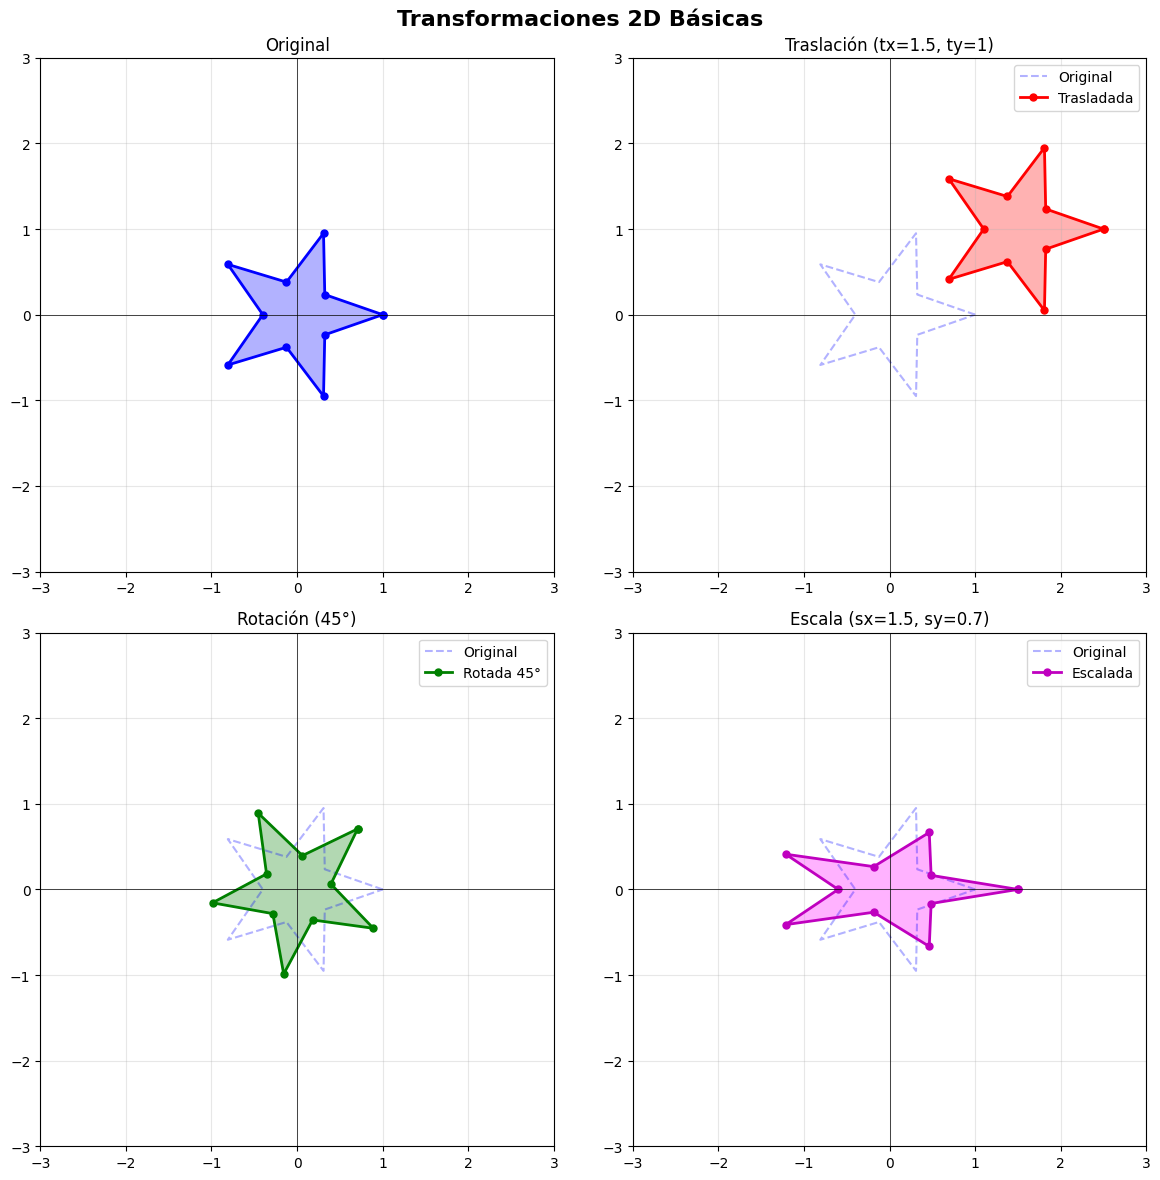

Matriz de Traslación (tx=1.5, ty=1):
[[1.  0.  1.5]
 [0.  1.  1. ]
 [0.  0.  1. ]]

Matriz de Rotación (45°):
[[ 0.70710678 -0.70710678  0.        ]
 [ 0.70710678  0.70710678  0.        ]
 [ 0.          0.          1.        ]]

Matriz de Escala (sx=1.5, sy=0.7):
[[1.5 0.  0. ]
 [0.  0.7 0. ]
 [0.  0.  1. ]]


In [30]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
fig.suptitle('Transformaciones 2D Básicas', fontsize=16, fontweight='bold')

# Original
ax = axes[0, 0]
ax.plot(star[0, :], star[1, :], 'b-o', linewidth=2, markersize=5)
ax.fill(star[0, :], star[1, :], alpha=0.3, color='blue')
ax.set_title('Original')
ax.grid(True, alpha=0.3)
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_aspect('equal')
ax.axhline(y=0, color='k', linewidth=0.5)
ax.axvline(x=0, color='k', linewidth=0.5)

# Traslación
ax = axes[0, 1]
T = translation_matrix(1.5, 1)
star_translated = apply_transformation(star, T)
ax.plot(star[0, :], star[1, :], 'b--', alpha=0.3, label='Original')
ax.plot(star_translated[0, :], star_translated[1, :], 'r-o', linewidth=2, markersize=5, label='Trasladada')
ax.fill(star_translated[0, :], star_translated[1, :], alpha=0.3, color='red')
ax.set_title('Traslación (tx=1.5, ty=1)')
ax.grid(True, alpha=0.3)
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_aspect('equal')
ax.axhline(y=0, color='k', linewidth=0.5)
ax.axvline(x=0, color='k', linewidth=0.5)
ax.legend()

# Rotación
ax = axes[1, 0]
R = rotation_matrix(np.pi/4)  # 45 grados
star_rotated = apply_transformation(star, R)
ax.plot(star[0, :], star[1, :], 'b--', alpha=0.3, label='Original')
ax.plot(star_rotated[0, :], star_rotated[1, :], 'g-o', linewidth=2, markersize=5, label='Rotada 45°')
ax.fill(star_rotated[0, :], star_rotated[1, :], alpha=0.3, color='green')
ax.set_title('Rotación (45°)')
ax.grid(True, alpha=0.3)
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_aspect('equal')
ax.axhline(y=0, color='k', linewidth=0.5)
ax.axvline(x=0, color='k', linewidth=0.5)
ax.legend()

# Escala
ax = axes[1, 1]
S = scale_matrix(1.5, 0.7)
star_scaled = apply_transformation(star, S)
ax.plot(star[0, :], star[1, :], 'b--', alpha=0.3, label='Original')
ax.plot(star_scaled[0, :], star_scaled[1, :], 'm-o', linewidth=2, markersize=5, label='Escalada')
ax.fill(star_scaled[0, :], star_scaled[1, :], alpha=0.3, color='magenta')
ax.set_title('Escala (sx=1.5, sy=0.7)')
ax.grid(True, alpha=0.3)
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_aspect('equal')
ax.axhline(y=0, color='k', linewidth=0.5)
ax.axvline(x=0, color='k', linewidth=0.5)
ax.legend()

plt.tight_layout()
plt.show()

# Mostrar las matrices
print("Matriz de Traslación (tx=1.5, ty=1):")
print(T)
print("\nMatriz de Rotación (45°):")
print(R)
print("\nMatriz de Escala (sx=1.5, sy=0.7):")
print(S)

## 5. Transformaciones Compuestas

Las transformaciones se pueden combinar multiplicando matrices. ¡El orden importa!

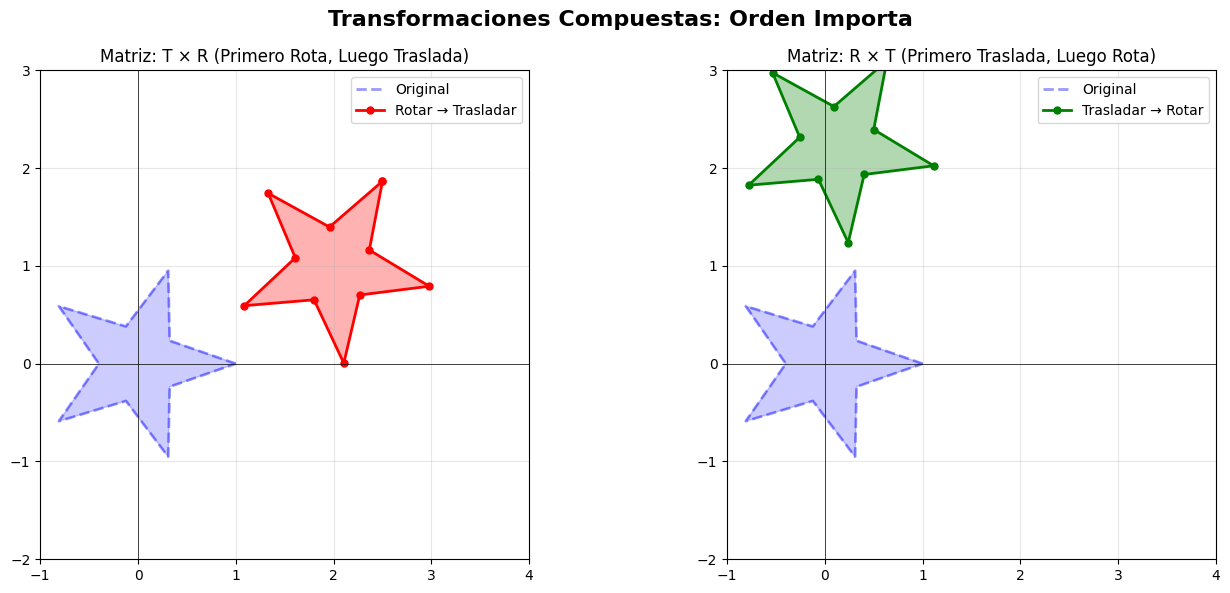

Matriz Compuesta 1 (T × R):
[[ 0.5       -0.8660254  2.       ]
 [ 0.8660254  0.5        1.       ]
 [ 0.         0.         1.       ]]

Matriz Compuesta 2 (R × T):
[[ 0.5        -0.8660254   0.1339746 ]
 [ 0.8660254   0.5         2.23205081]
 [ 0.          0.          1.        ]]

¡Las matrices son diferentes! Por eso el resultado es diferente.


In [31]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Transformaciones Compuestas: Orden Importa', fontsize=16, fontweight='bold')

# Orden 1: Rotar luego trasladar
ax = axes[0]
T = translation_matrix(2, 1)
R = rotation_matrix(np.pi/3)
M1 = T @ R  # Primero rota, luego traslada
star_transformed1 = apply_transformation(star, M1)

ax.plot(star[0, :], star[1, :], 'b--', alpha=0.4, linewidth=2, label='Original')
ax.fill(star[0, :], star[1, :], alpha=0.2, color='blue')
ax.plot(star_transformed1[0, :], star_transformed1[1, :], 'r-o', linewidth=2, markersize=5, label='Rotar → Trasladar')
ax.fill(star_transformed1[0, :], star_transformed1[1, :], alpha=0.3, color='red')
ax.set_title('Matriz: T × R (Primero Rota, Luego Traslada)')
ax.grid(True, alpha=0.3)
ax.set_xlim(-1, 4)
ax.set_ylim(-2, 3)
ax.set_aspect('equal')
ax.axhline(y=0, color='k', linewidth=0.5)
ax.axvline(x=0, color='k', linewidth=0.5)
ax.legend()

# Orden 2: Trasladar luego rotar
ax = axes[1]
M2 = R @ T  # Primero traslada, luego rota
star_transformed2 = apply_transformation(star, M2)

ax.plot(star[0, :], star[1, :], 'b--', alpha=0.4, linewidth=2, label='Original')
ax.fill(star[0, :], star[1, :], alpha=0.2, color='blue')
ax.plot(star_transformed2[0, :], star_transformed2[1, :], 'g-o', linewidth=2, markersize=5, label='Trasladar → Rotar')
ax.fill(star_transformed2[0, :], star_transformed2[1, :], alpha=0.3, color='green')
ax.set_title('Matriz: R × T (Primero Traslada, Luego Rota)')
ax.grid(True, alpha=0.3)
ax.set_xlim(-1, 4)
ax.set_ylim(-2, 3)
ax.set_aspect('equal')
ax.axhline(y=0, color='k', linewidth=0.5)
ax.axvline(x=0, color='k', linewidth=0.5)
ax.legend()

plt.tight_layout()
plt.show()

print("Matriz Compuesta 1 (T × R):")
print(M1)
print("\nMatriz Compuesta 2 (R × T):")
print(M2)
print("\n¡Las matrices son diferentes! Por eso el resultado es diferente.")

## 6. Animación 1: Rotación Continua

In [38]:
import io
from PIL import Image

# Crear frames para la animación
n_frames = 60
frames = []

fig, ax = plt.subplots(figsize=(8, 8))

for frame in range(n_frames):
    ax.clear()
    
    # Calcular ángulo de rotación
    angle = 2 * np.pi * frame / n_frames
    
    # Crear matriz de rotación
    R = rotation_matrix(angle)
    
    # Aplicar transformación
    star_rotated = apply_transformation(star, R)
    
    # Dibujar
    ax.plot(star_rotated[0, :], star_rotated[1, :], 'b-o', linewidth=2, markersize=6)
    ax.fill(star_rotated[0, :], star_rotated[1, :], alpha=0.4, color='cyan')
    
    # Configurar ejes
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)
    ax.axhline(y=0, color='k', linewidth=0.5)
    ax.axvline(x=0, color='k', linewidth=0.5)
    ax.set_title(f'Rotación Continua\nÁngulo: {np.degrees(angle):.1f}°\nFrame: {frame+1}/{n_frames}', 
                 fontsize=14, fontweight='bold')
    
    # Mostrar matriz
    matrix_text = f'Matriz de Rotación:\n'
    matrix_text += f'[{R[0,0]:6.3f}  {R[0,1]:6.3f}  {R[0,2]:6.3f}]\n'
    matrix_text += f'[{R[1,0]:6.3f}  {R[1,1]:6.3f}  {R[1,2]:6.3f}]\n'
    matrix_text += f'[{R[2,0]:6.3f}  {R[2,1]:6.3f}  {R[2,2]:6.3f}]'
    
    ax.text(0.02, 0.98, matrix_text, transform=ax.transAxes,
            fontsize=9, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8),
            family='monospace')
    
    # ✅ CORRECCIÓN: capturar frame con PIL vía buffer en memoria
    buf = io.BytesIO()
    fig.savefig(buf, format='png', dpi=100)
    buf.seek(0)
    img = Image.open(buf).copy()  # .copy() para desacoplar del buffer
    frames.append(img)
    buf.close()

plt.close()

# ✅ Guardar como GIF animado con PIL (más confiable)
output_path = r'D:\INGENIERIA DE SISTEMAS Y COMPUTACION\Semester 8\VisualComputing2026-l\semana_1_4_transformaciones\media\rotation_animation.gif'
frames[0].save(
    output_path,
    save_all=True,
    append_images=frames[1:],
    optimize=False,
    duration=1000 // 20,  # ms por frame (fps=20)
    loop=0               # 0 = loop infinito
)
print(f"✓ Animación guardada como '{output_path}'")

show_gif(output_path)

✓ Animación guardada como 'D:\INGENIERIA DE SISTEMAS Y COMPUTACION\Semester 8\VisualComputing2026-l\semana_1_4_transformaciones\media\rotation_animation.gif'


## 7. Animación 2: Trayectoria Circular con Rotación y Escala

✓ Animación guardada como 'D:\INGENIERIA DE SISTEMAS Y COMPUTACION\Semester 8\VisualComputing2026-l\semana_1_4_transformaciones\media\combined_transformation.gif'


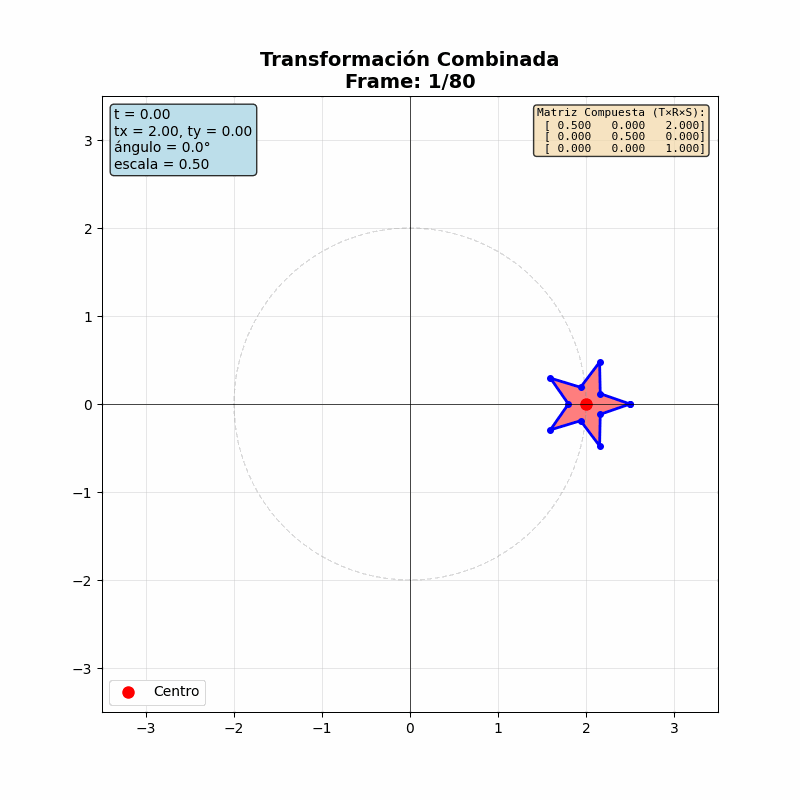

In [39]:
import io
from PIL import Image as PILImage

# Crear frames para la animación combinada
n_frames = 80
frames = []
radius = 2

fig, ax = plt.subplots(figsize=(8, 8))

for frame in range(n_frames):
    ax.clear()
    
    # Parámetro temporal
    t = 2 * np.pi * frame / n_frames
    
    # Traslación en trayectoria circular
    tx = radius * np.cos(t)
    ty = radius * np.sin(t)
    
    # Rotación (3 veces más rápida que la traslación)
    angle = 3 * t
    
    # Escala pulsante
    scale_factor = 0.5 + 0.3 * np.sin(4 * t)
    
    # Crear y combinar matrices
    T = translation_matrix(tx, ty)
    R = rotation_matrix(angle)
    S = scale_matrix(scale_factor, scale_factor)
    
    # Orden de transformación: Escalar → Rotar → Trasladar
    M = T @ R @ S
    
    # Aplicar transformación
    star_transformed = apply_transformation(star, M)
    
    # Dibujar trayectoria
    angles = np.linspace(0, 2*np.pi, 100)
    circle_x = radius * np.cos(angles)
    circle_y = radius * np.sin(angles)
    ax.plot(circle_x, circle_y, 'gray', linestyle='--', alpha=0.3, linewidth=1)
    
    # Dibujar estrella
    ax.plot(star_transformed[0, :], star_transformed[1, :], 'b-o', linewidth=2, markersize=4)
    ax.fill(star_transformed[0, :], star_transformed[1, :], alpha=0.5, 
            color=plt.cm.hsv(frame/n_frames))
    
    # Marcar centro de la estrella
    ax.plot(tx, ty, 'ro', markersize=8, label='Centro')
    
    # Configurar ejes
    ax.set_xlim(-3.5, 3.5)
    ax.set_ylim(-3.5, 3.5)
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)
    ax.axhline(y=0, color='k', linewidth=0.5)
    ax.axvline(x=0, color='k', linewidth=0.5)
    ax.set_title(f'Transformación Combinada\nFrame: {frame+1}/{n_frames}', 
                 fontsize=14, fontweight='bold')
    ax.legend()
    
    # Mostrar parámetros
    info_text = f't = {t:.2f}\n'
    info_text += f'tx = {tx:.2f}, ty = {ty:.2f}\n'
    info_text += f'ángulo = {np.degrees(angle):.1f}°\n'
    info_text += f'escala = {scale_factor:.2f}'
    
    ax.text(0.02, 0.98, info_text, transform=ax.transAxes,
            fontsize=10, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))
    
    # Mostrar matriz resultante
    matrix_text = f'Matriz Compuesta (T×R×S):\n'
    matrix_text += f'[{M[0,0]:6.3f}  {M[0,1]:6.3f}  {M[0,2]:6.3f}]\n'
    matrix_text += f'[{M[1,0]:6.3f}  {M[1,1]:6.3f}  {M[1,2]:6.3f}]\n'
    matrix_text += f'[{M[2,0]:6.3f}  {M[2,1]:6.3f}  {M[2,2]:6.3f}]'
    
    ax.text(0.98, 0.98, matrix_text, transform=ax.transAxes,
            fontsize=8, verticalalignment='top', horizontalalignment='right',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8),
            family='monospace')
    
    # ✅ CORRECCIÓN: capturar frame con PIL vía buffer en memoria
    buf = io.BytesIO()
    fig.savefig(buf, format='png', dpi=100)
    buf.seek(0)
    img = PILImage.open(buf).copy()
    frames.append(img)
    buf.close()

plt.close()

# ✅ Guardar como GIF animado con PIL
output_path = r'D:\INGENIERIA DE SISTEMAS Y COMPUTACION\Semester 8\VisualComputing2026-l\semana_1_4_transformaciones\media\combined_transformation.gif'
frames[0].save(
    output_path,
    save_all=True,
    append_images=frames[1:],
    optimize=False,
    duration=1000 // 24,  # ms por frame (fps=24)
    loop=0                # loop infinito
)
print(f"✓ Animación guardada como '{output_path}'")

# ✅ Mostrar GIF animado en Jupyter
from IPython.display import Image as IPyImage, display
with open(output_path, 'rb') as f:
    display(IPyImage(data=f.read(), format='gif'))

## 8. Animación 3: Movimiento Senoidal

✓ Animación guardada como 'D:\INGENIERIA DE SISTEMAS Y COMPUTACION\Semester 8\VisualComputing2026-l\semana_1_4_transformaciones\media\sinusoidal_motion.gif'


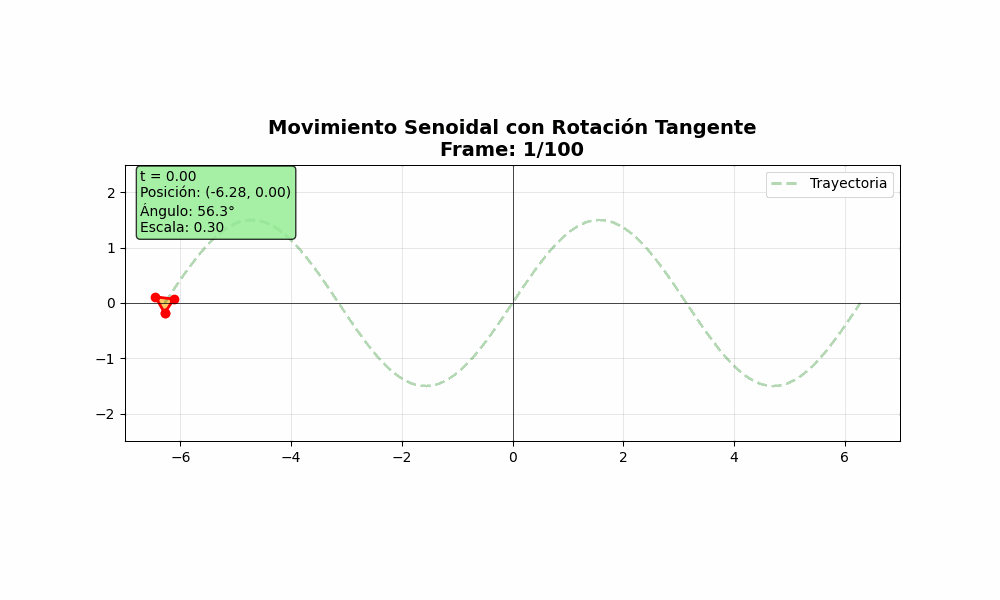

In [40]:
import io
from PIL import Image as PILImage

# Animación con trayectoria senoidal
n_frames = 100
frames = []

fig, ax = plt.subplots(figsize=(10, 6))

for frame in range(n_frames):
    ax.clear()
    
    # Parámetro temporal
    t = 4 * np.pi * frame / n_frames
    
    # Trayectoria senoidal
    tx = t - 2*np.pi
    ty = 1.5 * np.sin(t)
    
    # Rotación sincronizada con la pendiente
    angle = np.arctan(1.5 * np.cos(t))  # Tangente a la curva
    
    # Escala variable
    scale_factor = 0.3 + 0.1 * np.abs(np.sin(2*t))
    
    # Crear matrices
    T = translation_matrix(tx, ty)
    R = rotation_matrix(angle)
    S = scale_matrix(scale_factor, scale_factor)
    
    # Combinar transformaciones
    M = T @ R @ S
    
    # Aplicar a un triángulo
    triangle_transformed = apply_transformation(triangle, M)
    
    # Dibujar la trayectoria completa
    t_path = np.linspace(0, 4*np.pi, 200)
    x_path = t_path - 2*np.pi
    y_path = 1.5 * np.sin(t_path)
    ax.plot(x_path, y_path, 'g--', alpha=0.3, linewidth=2, label='Trayectoria')
    
    # Marcar camino recorrido
    t_past = np.linspace(0, t, min(100, frame+1))
    x_past = t_past - 2*np.pi
    y_past = 1.5 * np.sin(t_past)
    ax.plot(x_past, y_past, 'b-', alpha=0.6, linewidth=3)
    
    # Dibujar triángulo
    ax.plot(triangle_transformed[0, :], triangle_transformed[1, :], 'r-o', 
            linewidth=2, markersize=6)
    ax.fill(triangle_transformed[0, :], triangle_transformed[1, :], 
            alpha=0.6, color='orange')
    
    # Configurar ejes
    ax.set_xlim(-7, 7)
    ax.set_ylim(-2.5, 2.5)
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)
    ax.axhline(y=0, color='k', linewidth=0.5)
    ax.axvline(x=0, color='k', linewidth=0.5)
    ax.set_title(f'Movimiento Senoidal con Rotación Tangente\nFrame: {frame+1}/{n_frames}', 
                 fontsize=14, fontweight='bold')
    ax.legend()
    
    # Información
    info_text = f't = {t:.2f}\n'
    info_text += f'Posición: ({tx:.2f}, {ty:.2f})\n'
    info_text += f'Ángulo: {np.degrees(angle):.1f}°\n'
    info_text += f'Escala: {scale_factor:.2f}'
    
    ax.text(0.02, 0.98, info_text, transform=ax.transAxes,
            fontsize=10, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))
    
    # ✅ CORRECCIÓN: capturar frame con PIL
    buf = io.BytesIO()
    fig.savefig(buf, format='png', dpi=100)
    buf.seek(0)
    img = PILImage.open(buf).copy()
    frames.append(img)
    buf.close()

plt.close()

# ✅ Guardar GIF animado con PIL
output_path = r'D:\INGENIERIA DE SISTEMAS Y COMPUTACION\Semester 8\VisualComputing2026-l\semana_1_4_transformaciones\media\sinusoidal_motion.gif'
frames[0].save(
    output_path,
    save_all=True,
    append_images=frames[1:],
    optimize=False,
    duration=1000 // 25,  # ms por frame (fps=25)
    loop=0
)
print(f"✓ Animación guardada como '{output_path}'")

# ✅ Mostrar GIF animado
from IPython.display import Image as IPyImage, display
with open(output_path, 'rb') as f:
    display(IPyImage(data=f.read(), format='gif'))